In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/185496
Connected. Call `.close()` to terminate connection gracefully.


In [8]:
wine_red_df = pd.read_csv("wine+quality/winequality-red.csv", sep=';')
# add a column to indicate the red wine type
# wine_red_df['type'] = -1


wine_white_df = pd.read_csv("wine+quality/winequality-white.csv", sep=';')
# add a column to indicate the white wine type
# wine_white_df['type'] = 1

# concatenate the two datasets
wine_df = pd.concat([wine_red_df, wine_white_df], axis=0)

# set lowercase
wine_df.columns = wine_df.columns.str.lower()

# replace spaces with underscores
wine_df.columns = wine_df.columns.str.replace(' ', '_')

wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [8]:
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


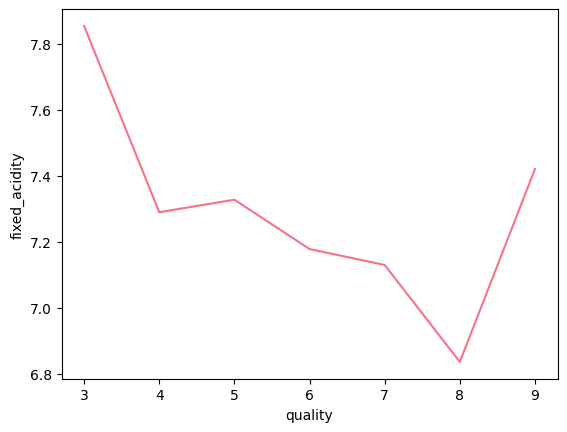

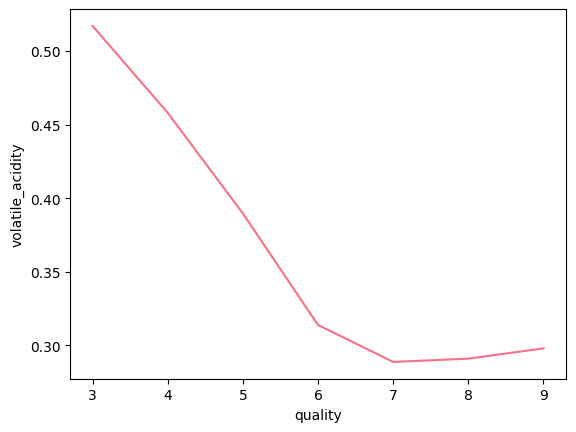

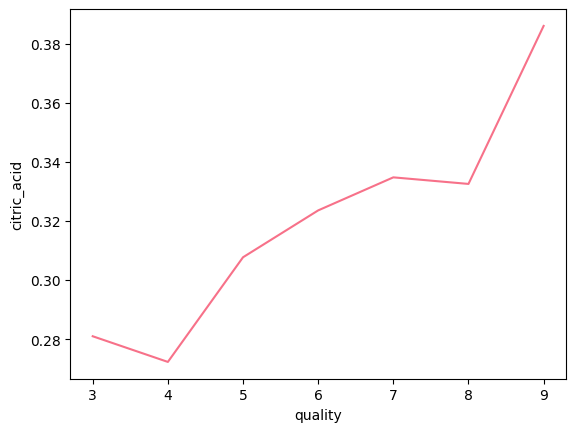

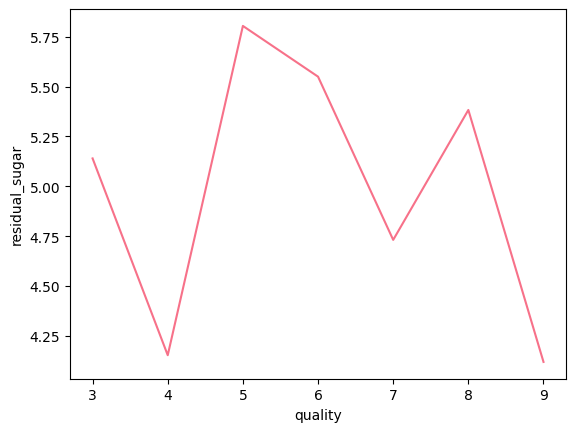

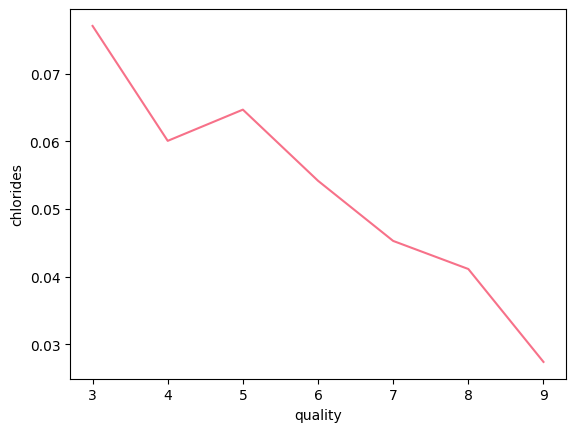

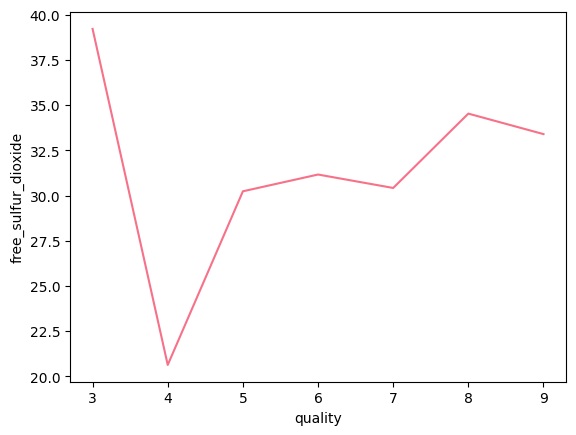

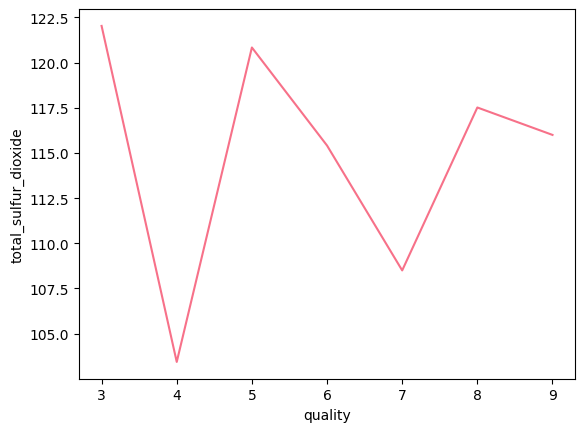

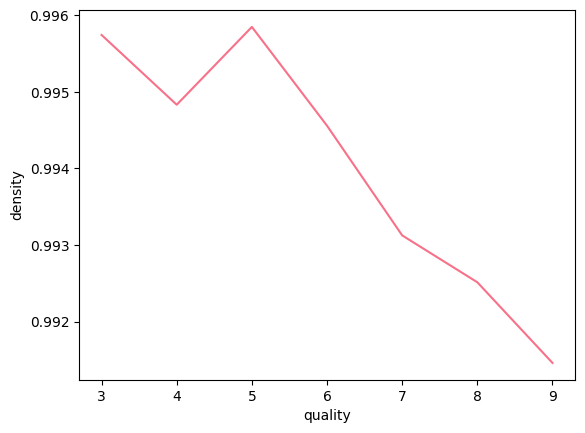

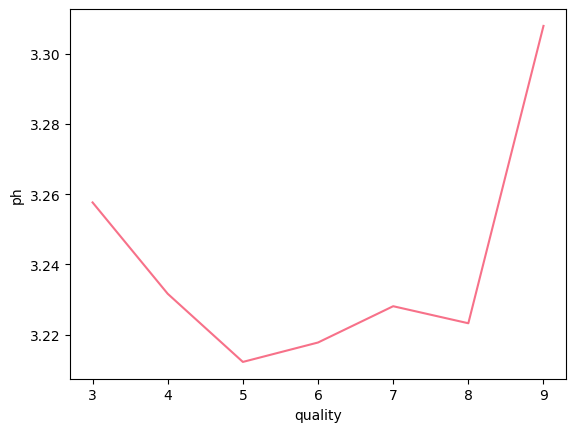

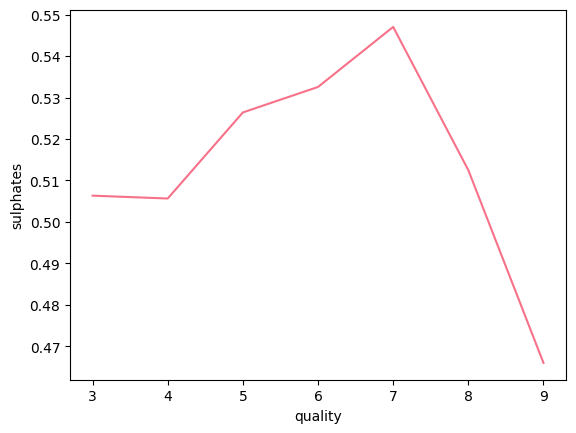

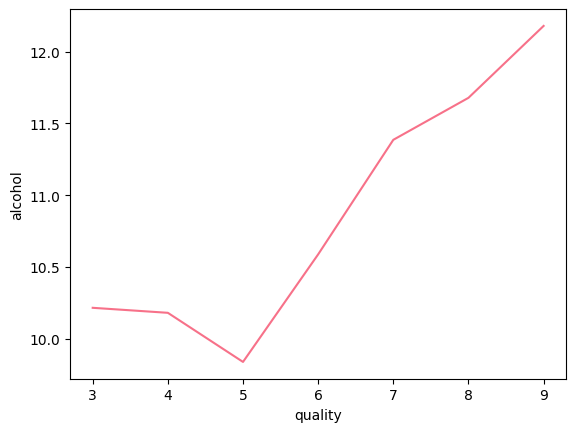

KeyError: 'quality'

In [21]:
mean_quality = wine_df.groupby('quality').mean()

# create a line plot per column to show how the mean value changes with the quality
for col in wine_df.columns:
    sns.lineplot(data=mean_quality[col])
    plt.show()

In [9]:
wine_df['type'].value_counts()
# wont work because the label is not a discrete value

type
white    4898
red      1599
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)  our Iris Data

Let's look at our iris flower - the distribution and range of values for the 4 different features
 * sepal_length
 * sepal_width
 * petal_length
 * petal_width
 
 and the target variable is `variety`.

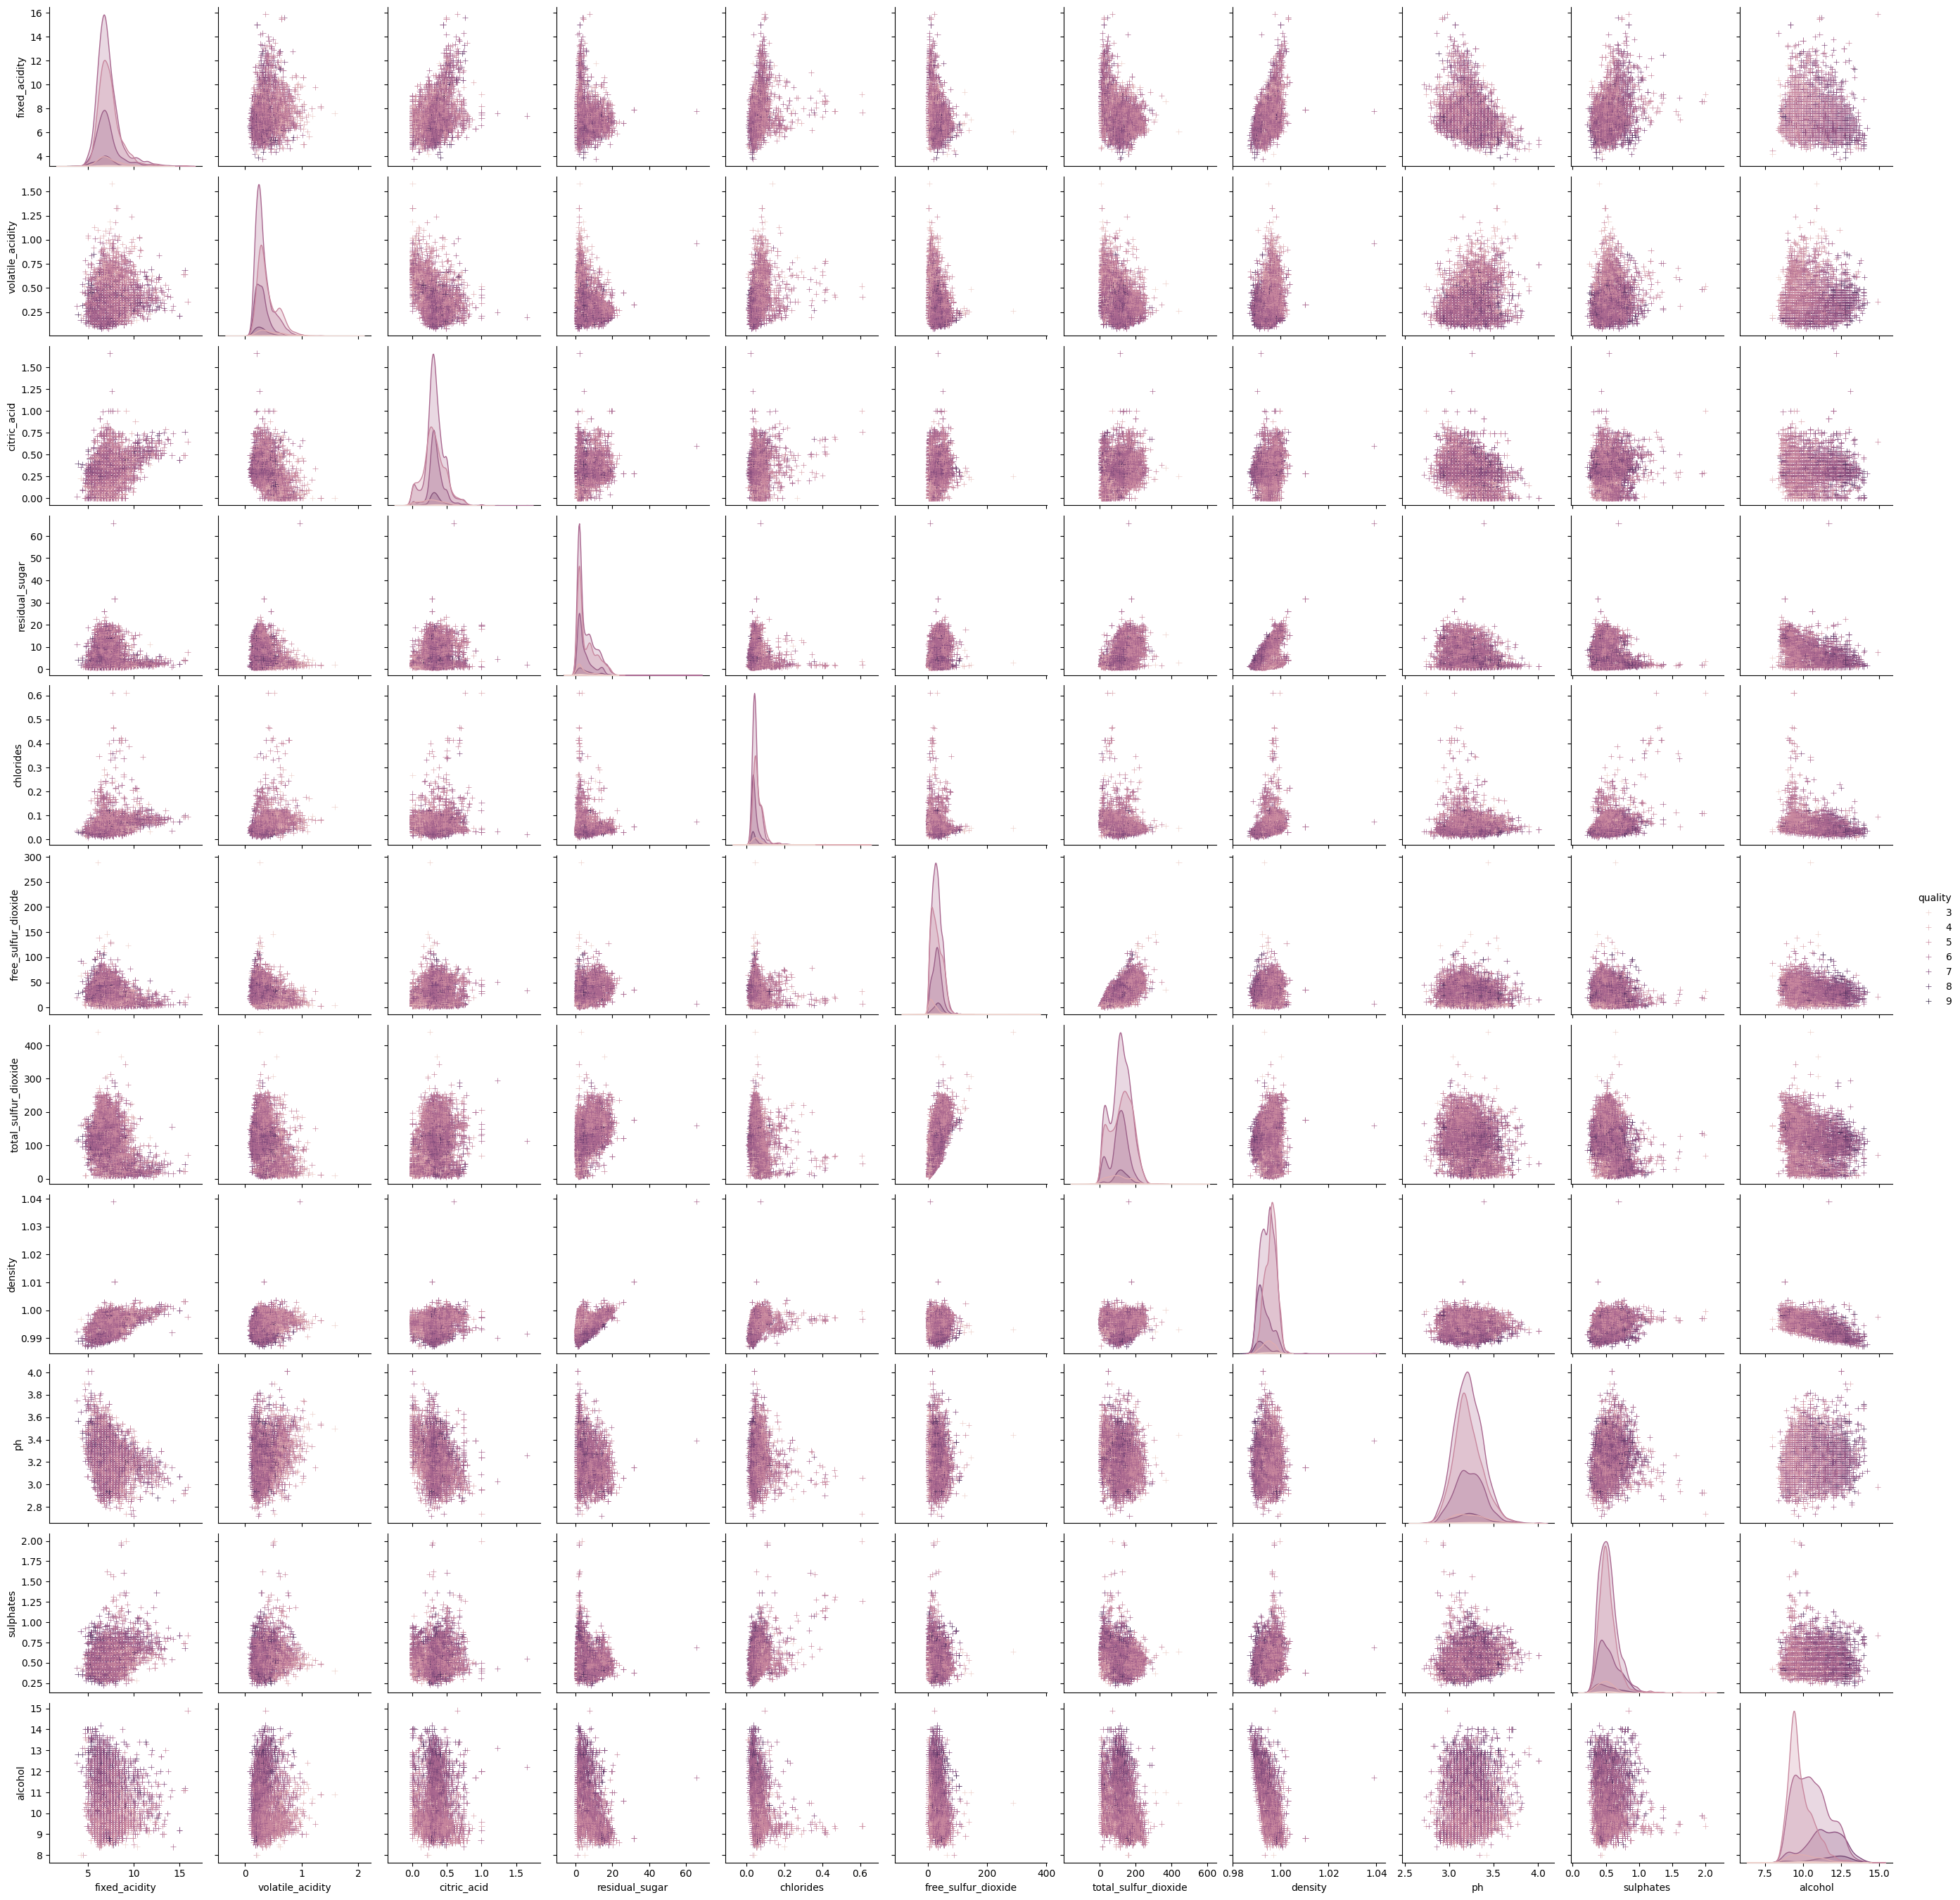

In [10]:
g = sns.pairplot(wine_df, hue='quality', markers='+')
plt.show()

### Visualize range of values 

We want to design a simulator generate the 3 types of iris flower (setosa, versicolor, virginica).
To do this, we can visualize the range of values for the length and width of the sepal and petal for each of the 3 flowers.

In [22]:
# find the correlation between the variables
wine_corr_df = wine_df[wine_df.columns[wine_df.columns != 'type']].corr()
wine_corr_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
ph,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [23]:
wine_corr_df.round(0)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
fixed_acidity,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
volatile_acidity,0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
citric_acid,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
residual_sugar,-0.0,-0.0,0.0,1.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0
chlorides,0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
free_sulfur_dioxide,-0.0,-0.0,0.0,0.0,-0.0,1.0,1.0,0.0,-0.0,-0.0,-0.0,0.0
total_sulfur_dioxide,-0.0,-0.0,0.0,0.0,-0.0,1.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0
density,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-0.0
ph,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0,0.0,0.0,0.0
sulphates,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,1.0,-0.0,0.0


### Insert our Iris DataFrame into a FeatureGroup
Let's write our historical iris feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [10]:
# get list of all columns except 'quality'
list(wine_df.columns[wine_df.columns != 'quality'])

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol']

In [11]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=3,
    primary_key=list(wine_df.columns[wine_df.columns != 'quality']),
    description="Wine quality dataset")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/185496/fs/185415/fg/205142


Uploading Dataframe: 0.00% |          | Rows 0/6497 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_3_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/185496/jobs/named/wine_3_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x281adb1f0>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.

In [14]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [15]:
suite = ExpectationSuite(expectation_suite_name="wine_characteristics")

# expect(suite, "sepal_length", 4.5, 8.0)
# expect(suite, "sepal_width", 2.1, 4.5)
# expect(suite, "petal_length", 1.2, 7)
# expect(suite, "petal_width", 0.2, 2.5)


for column in wine_df.columns:
    if column in ["quality", "type"]:
        continue
    expect(suite, column, wine_df[column].min() - 0.1, wine_df[column].max() + 0.1)

wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

RestAPIError: Metadata operation error: (url: https://c.app.hopsworks.ai/hopsworks-api/api/project/185496/featurestores/185415/featuregroups/194931/expectationsuite). Server response: 
HTTP code: 409, HTTP reason: Conflict, body: b'{"errorCode":270208,"errorMsg":"An expectation suite is already attached to this feature group. Either update the existing suite via the update endpoint or delete it first."}', error code: 270208, error msg: An expectation suite is already attached to this feature group. Either update the existing suite via the update endpoint or delete it first., user msg: 